# Proyecto: Análisis de mercado inmobiliario

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).


## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 1. Pensando como un Cientifico de Datos.

### ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

Los datos que me parecen mas importante, para poder estimar correctamente el precio del inmuble son  la ubicacion (l3), la superficie total (surficie_total) y Superficie Cubierta(surface_covered). Otro dato que sería importante es el estado actual del inmueble. 

## 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

2.1 Importamos librerias utiles para trabajar.

In [2]:
# 1 Importar liberias utiles
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


2.2 Cargamos el archivo utils.py. En este archivo contiene las funciones desarrolladas durante el proceso.

In [3]:
class utils:
    @staticmethod
    def open_csv(path):
        return pd.read_csv(path)

    @staticmethod
    def graph_by_property_value(property_name, property_value, order_array, ax1,ax2):
        a = sns.countplot(data = dataset[dataset.l2 == property_value],y=property_name, palette="Set3",ax=ax[ax1,ax2], order=order_array)
        a.set_title(property_value)
    
    @staticmethod
    def split(features,obj,test_size):
        X_train, X_test, Y_train, Y_test = train_test_split(features, obj, 
                                                            test_size=test_size, 
                                                            random_state=42)
        return X_train, X_test, Y_train, Y_test
    
    
    @staticmethod
    def calculate_rmse(model, X_train, X_test, Y_train, Y_test):
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        
        print(f'Err Train: {rmse_train}')
        print(f'Err Test: {rmse_test}')

    @staticmethod
    def rmse_graph(model, X_train, X_test, Y_train, Y_test):
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        
        print(f'Err Train: {rmse_train}')
        print(f'Err Test: {rmse_test}')

        plt.figure(figsize = (10,4))
        
        sns.distplot(Y_train - Y_train_pred, bins = 20, label = 'train')
        sns.distplot(Y_test - Y_test_pred, bins = 20, label = 'test')
        
        plt.xlabel('Errores')
        plt.legend()

    
    @staticmethod
    def decision_tree(title, depths, X_train, X_test, Y_train, Y_test):
        #Define error list
        err_train = []
        err_test = []
        for depth in depths:
            
            #Define DesitionTreeRegresson and fit it
            a = DecisionTreeRegressor(max_depth = depth, random_state = 42)
            a.fit(X_train, Y_train)
            
            #try
            Y_train_pred = a.predict(X_train)
            train_err = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
            
            Y_test_pred = a.predict(X_test)
            test_err = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

            #save the error
            err_train.append(train_err)
            err_test.append(test_err)
         
        plt.plot(depths, err_train,'o-',label='train' )
        plt.plot(depths, err_test, 'o-',label='test')
        plt.legend()
        plt.title(title)
        plt.xlabel('depths')
        plt.ylabel('error')
    

    @staticmethod
    def knn(titulo, k_vecinos, X_train, X_test, y_train, y_test):
        # Definimos las listas vacias para los valores de error deseados
        lista_error_train = []
        lista_error_test = []

        for k in k_vecinos:
            # Definir el modelo con el valor de vecinos deseado
            clf = KNeighborsRegressor(n_neighbors= k)

            # Entrenar el modelo
            clf.fit(X_train, y_train)

            # Predecir y evaluar sobre el set de entrenamiento
            y_train_pred = clf.predict(X_train)
            train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

            # Predecir y evaluar sobre el set de evaluación
            y_test_pred = clf.predict(X_test)
            test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

            # Agregar la información a las listas
            lista_error_train.append(train_err)
            lista_error_test.append(test_err)

        plt.plot(k_vecinos, lista_error_train,'o-',label='train' )
        plt.plot(k_vecinos, lista_error_test, 'o-',label='test')
        plt.legend()
        plt.title(titulo)
        plt.xlabel('k_vecinos')
        plt.ylabel('error')
        plt.ylabel('error')

2.3 Cargamos el Dataset. Si no se encuentra el dataset, descomprimir zip ubicado en /Datasets.

In [6]:
# 2. Cargar dataset, informacion general.
path = "C:/Users/Usuario/source/repos/acamica-ds-spr2/Datasets/DS_Proyecto_01_Datos_Properati.csv"
dataset = pd.read_csv(path)
dataset.head()
dataset.shape

(146660, 19)

2.4 Realizamos una aproximación al dataset, mostrando las primeros cinco instancias, la cantidad de propiedades.

In [7]:
# 3.Limpiar Dataset
#¿Cuántos tipos de propiedad hay publicados según este dataset?
print("Cantidad de propiedades publicadas en el dataset: " + str(dataset.shape[1]))

Cantidad de propiedades publicadas en el dataset: 19


In [8]:
#¿Cuántos instancias por cada tipo de propiedad hay en el dataset?
print("Cantidad de instancias por cada tipo de propiedad:")
dataset.count()

Cantidad de instancias por cada tipo de propiedad:


start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

2.5 Descartamos propiedades que no son utiles para nuestro analisis y contamos la cantidad de datos faltantes por columna que tiene el dataset.

In [9]:
dataset.drop(['l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'currency','description','operation_type'], 'columns', inplace = True )
print("Luego de limpiar el dataset la cantidad de propiedades son: " + str(dataset.shape[1]))


Luego de limpiar el dataset la cantidad de propiedades son: 9


2.6 Vemos cuantos nulls hay en cada columna

In [10]:
print("Nulls en cada columna:")
dataset.isna().sum()

Nulls en cada columna:


l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

2.7 Reemplazamos los valores Nulos en bathrooms, surface_total y surface_covered. En todos los casos utilizamos la moda 

In [11]:
# Para baños tomamos la moda
bathroom_mode = dataset["bathrooms"].mode()[0]
dataset["bathrooms"].fillna(bathroom_mode, inplace = True)

# Para superficie Total, tomamos la cubierta, en caso de ser null tambien, asignamos la moda.
surface_covered_mode = dataset["surface_covered"].mode()[0]
surface_total_mode = dataset["surface_total"].mode()[0]

dataset["surface_covered"].fillna(surface_covered_mode, inplace = True)
dataset["surface_total"].fillna(surface_total_mode, inplace = True)

print(dataset.isna().sum())

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64


2.8 Vemos cantidad de registros por tipo de propiedad 

2.13 Seleccionamos las tres clases más abundantes de tipos de propiedad `Casa`,`PH`,`Departamento `y la región con más propiedades publicadas `Capital Federal`

In [12]:
# Seleccionar las tres clases de propiedad mas frecuentes.

#Conditions: 
dataset_region_mas_publicada = dataset[dataset["l2"]=="Capital Federal"]

a = dataset_region_mas_publicada["property_type"].value_counts().index[0]
b = dataset_region_mas_publicada["property_type"].value_counts().index[1]
c = dataset_region_mas_publicada["property_type"].value_counts().index[2]


dataset_filtered = dataset_region_mas_publicada[(dataset_region_mas_publicada["property_type"] == a) |
                                                (dataset_region_mas_publicada["property_type"] == b) |
                                                (dataset_region_mas_publicada["property_type"] == c)
                                               ]
dataset_filtered.shape


(91485, 9)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

2.14 Notamos que las Casas presentan mayor superficie que los PH y los departamentos.
Esta relacion se da tanto tomando superficie total como superficie cubierta.
Cuando evaluamos los precios, notamos que PH es el metro cuadrado mas economico para comprar. Los departamentos presentan el metro cuadrado mas caro, en relacion a la supercie construida.

2.15 Debemos Estudiar la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?
Elegimos superficie total y precio y realizamos graficos de cajas.

2.16 Como notamos que hay valores atipocos, filtramos los datos nuevamente. Tanto para `surface_total` y para `price`, establecemos un maximo y un minimo.

`Departamentos` entre 15 y 150 metros cuadrados. Precio menor a 550.000 pesos.

`PH` entre 50 y 350 metros cuadrados. Precio menor a 450.000 pesos.

`Casa` entre 25 y 800 metros cuadrados. Precio menor a 800.000 pesos.

Viendo el Mapa de calor, vemos que podemos descartar una entre rooms y bathroom, porque el valor es muy cercano a 1.
Si tomamos la variable a predecir y una de las otras propiedades, aquellas que se acercan a cero nos dicen que no existe una relacion lineal.

### 3. Machine Learning

En esta seccion debemos entrenar dos modelos de machine learning (arboles de decision y vecinos mas cercanos) con el objetivo de predecir el precio de propiedades de tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`).

Nota:
* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?


**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

3.1 Utilizaremos el error RMSE ya que no queremos castigar casos atipicos. En este caso nos interesa obtener valores BAJOS.

3.2 Cargamos liberias necesarias para crear y entrenar nuestro modelo de Machine learning.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

3.3 Utilizamos el dataset que limpiamos durante el analisis exploratorio de datos y definimos las variables predictoras y variables a predecir.

In [19]:
ds=dataset_filtered

X = ds.loc[:,['rooms', 'surface_covered','bathrooms', 'surface_total', 'bedrooms']]
y = ds.loc[:,'price']


3.4 La funcion utils_split toma una lista de fratures y la variable a predecir.Luego nos devuelve los valores que vamos a almacenar en las variables del Train Test Split.

In [21]:
X_train, X_test, Y_train, Y_test = utils.split(X, y, 0.30)

### Regresion lineal

3.4 Creamos modelos de regresion lineal y los entrenamos con la funcion Fit.

In [22]:
#Lineal Regression
regresor_linear = LinearRegression()
regresor_linear.fit(X_train, Y_train)


LinearRegression()

Con la funcion utils.rmse_graph corremos la funcion precict sobre train y test y finalmente mostramos un grafico RMSE para evaluar los valores predecidos.

In [23]:
utils.calculate_rmse(regresor_linear, X_train, 
                         X_test, Y_train, Y_test)

Err Train: 265531.8788064749
Err Test: 237405.23039615407


### Vecinos mas cercanos

In [30]:
clf = KNeighborsRegressor(10)
clf.fit(X_train, Y_train)


KNeighborsRegressor(n_neighbors=10)

In [31]:
utils.calculate_rmse(clf, X_train, 
                         X_test, Y_train, Y_test)

Err Train: 194085.94069895233
Err Test: 176049.23683607008


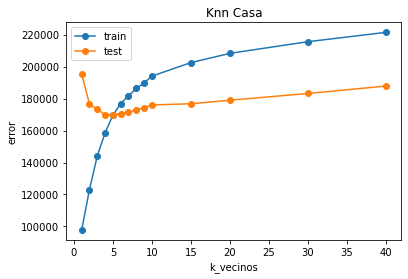

In [32]:
knn_quantity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]

# Casa
_knn = utils.knn('Knn Casa', knn_quantity, X_train, X_test, Y_train, Y_test)

Para Knn en Casa la cantidad de vecinos que mejor funciona es 10

Para Knn en Departamentos la cantidad de vecinos que mejor funciona es 12

### Arboles de decision 

In [36]:
#Arboles de desicion
a = DecisionTreeRegressor(max_depth = 10, random_state = 42)
a.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [37]:
utils.calculate_rmse(a, X_train, 
                         X_test, Y_train, Y_test)

Err Train: 131342.04481899692
Err Test: 167547.23542405185


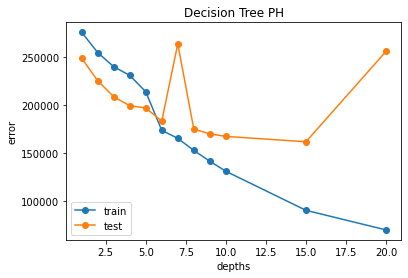

In [38]:
# PH
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
utils.decision_tree('Decision Tree PH', depths, X_train, X_test, Y_train, Y_test)

Para PH, la mejor profundidad para predecir es 7.